In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

In [4]:
    # reading the dataset using read_csv
    df = pd.read_csv("stocks.csv",
                    parse_dates=True,
                    index_col="Date")
    # displaying the first five rows of dataset
    df.head()

,Ticker,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2023-02-07,AAPL,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,AAPL,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2023-02-09,AAPL,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
2023-02-10,AAPL,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
2023-02-13,AAPL,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


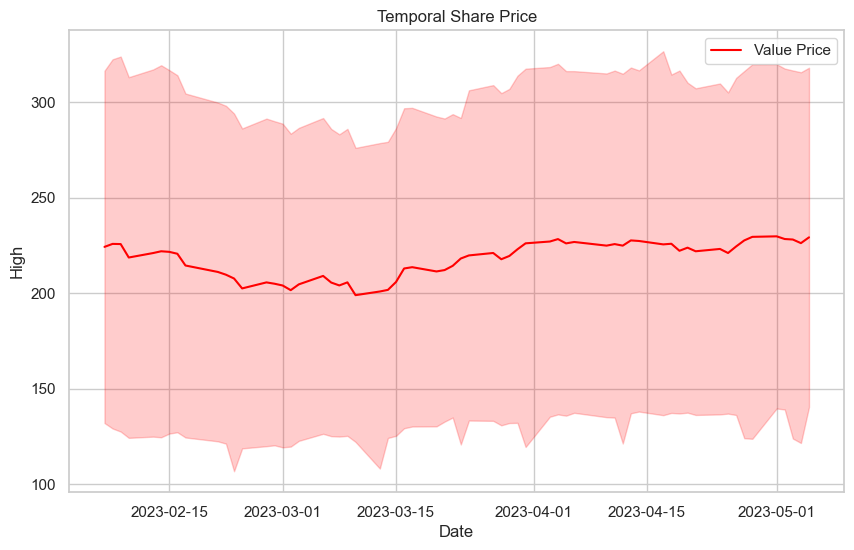

In [9]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Date', y='High', label='Value Price', color='red')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Temporal Share Price')

plt.show()

In [11]:
print(df.columns.tolist())

['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [12]:
df.columns = df.columns.str.strip()  # Remove whitespace


<Figure size 1000x600 with 0 Axes>

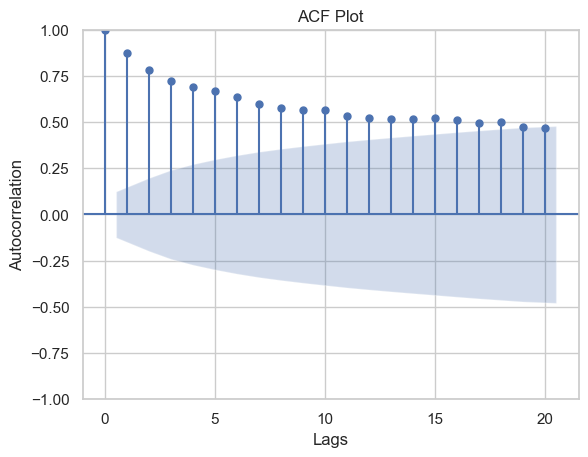

In [4]:
# Plotting the ACF
plt.figure(figsize=(10, 6))
plot_acf(df['Volume'], lags=20)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('ACF Plot')
plt.show()

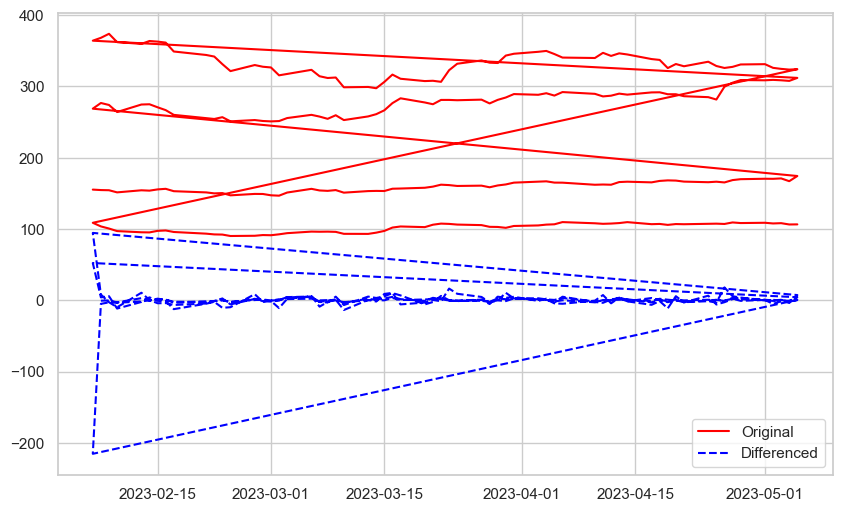

In [5]:
# Differencing
df['high_diff'] = df['High'].diff()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df[ 'High'], label='Original', color='red')
plt.plot(df['high_diff'], label='Differenced', linestyle= '--', color='blue')
plt.legend()

In [20]:
print(df['Ticker'].unique())

['AAPL' 'MSFT' 'NFLX' 'GOOG']


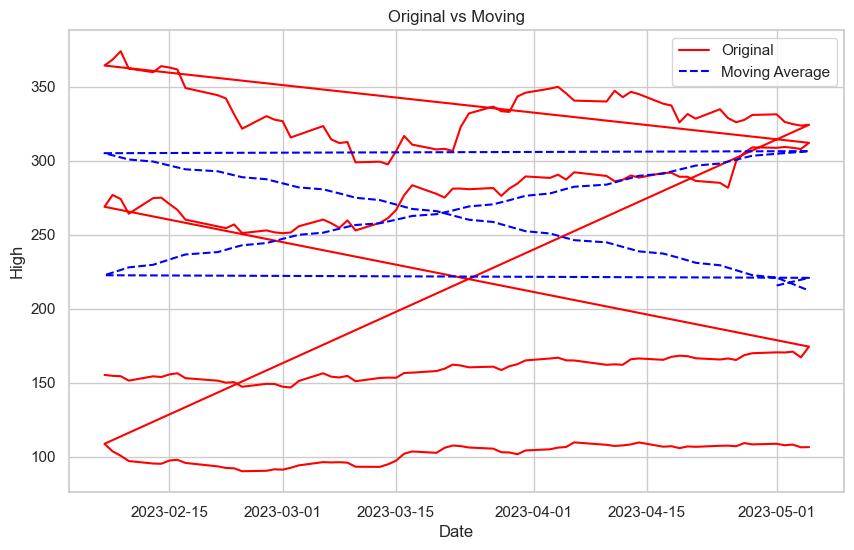

In [24]:
# Moving Average
window_size = 120
df['high_smoothed'] = df['High'].rolling(window=window_size).mean()

plt.figure(figsize=(10, 6))

plt.plot(df['High'], label='Original', color='red')
plt.plot(df['high_smoothed'], label=f'Moving Average', linestyle='--', color='blue')

plt.xlabel('Date')
plt.ylabel('High')
plt.title('Original vs Moving')
plt.legend()
plt.show()
